#**Iris Breed Predictor**

## **Goal**

The Goal of this application is to predict the breed of the iris flower based on features such as sepal length, sepal width, pedal length, and petal width. 
There are three diffent breeds of iris which we will use in this application: Sertosa, Verticolor, and Virginica.


The dataset I am using for this application is the iris dataset. This dataset is included in sklearn.datasets but for convince I also provided a link to the dataset (https://www.kaggle.com/uciml/iris) so it is easier to download if you do not have access to sklearn.

## **Getting Dataset**

The first step is to import all the built in functions that you need.



In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets

My next step is downloading the iris dataset from sklearn's datasets.

In [2]:
I = datasets.load_iris()

Once I've downloaded the data I like to see what it looks like so I just printed it.

In [3]:
print(I.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

After downloading the dataset I printed the features, Breeds, and how many lines are in the dataset.

In [4]:
#Print features 
print("Features:", I.feature_names)

#Print breeds 
print("Breeds:", I.target_names)

#Print number of lines in dataset
line = len(I.data) 
print("# of lines:", line)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Breeds: ['setosa' 'versicolor' 'virginica']
# of lines: 150


## **Splitting Dataset**

Splitting the dataset is important because it will give us some data to train our model with and some data to test our model with.
One of the rules of thumb for machine learning when it comes to splitting data is to do a 80/20 split. meaning 80% of your data will be training data and 20% of your data will be for testing.

From the previous section, we know there are 150 lines of data in this dataset so this will give us 120 training lines and 30 lines to test with.



You can also see that we shuffle the data in the data set. I do this to make sure I dont train my model with just one or two breeds.

In [5]:
#Do the Shuffle! (Shuffle the dataset)
data = np.zeros((line,4+1))
for i in range(line):
	data[i,0:4] = I.data[i]
	data[i,4] = I.target[i]

#Pick a random seed to shuffle with
np.random.seed(0)  
np.random.shuffle(data)

print("Done Shuffling!")

Done Shuffling!


Now lets split the data, The first line makes "Test" worth .2 or 20% of the dataset. The second line makes "Train" the remainder of the dataset (80%)

In [6]:
Test = np.int(np.round(line* 0.2)) 
Train = line - Test                 

Next, I slice the dataset into features which are the first 4 columns of each row and the breed which is the last column of each row.


In [7]:
Features = data[:,0:4]
Breed = data[:,4]

Lastly, I make two datasets as you can probably guess one is a training dataset and one is a training dataset. I did this by slicing my original dataset using the "Test" and "Train" values from the section above.

In [8]:
#Slice from 0-"Train"
Features_Training = Features[0:Train,:]
Breed_Training = Breed[0:Train]

#Slice from "Train"-"line" 
Features_Testing = Features[Train:line,:]
Breed_Testing = Breed[Train:line]

print("Done Splitting the dataset!")

Done Splitting the dataset!


## **Visualizing dataset**

Visualizing the you data helps give you a better idea of what the data actually looks like. I also use the visualizations to help me decide how I should go about predicting the breed. So for example, after I looked at these visualizations I knew it would be more difficult to do clustering so I decided a decision tree would be easier better at implementing

###**Scatter Plot**

First, I want to start off by making a scatter plot where the x-axis is the sepal length and the y-axis is the sepal width.

Text(0, 0.5, 'Sepal Width(cm)')

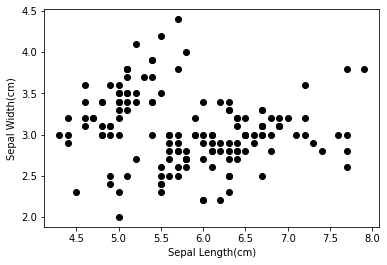

In [9]:
ind1 = 0 
ind2 = 1 
plt.figure(1)
plt.plot(Features[:,ind1], Features[:,ind2], 'ko') 
plt.xlabel("Sepal Length(cm)")
plt.ylabel("Sepal Width(cm)")

Next, I did a scatter plot with my x-axis as the petal length and my y-axis as the petal width.

Text(0, 0.5, 'Petal Width(cm)')

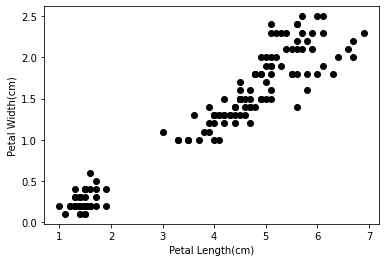

In [10]:
ind1 = 2
ind2 = 3 
plt.figure(2)
plt.plot(Features[:,ind1], Features[:,ind2], 'ko' ) 
plt.xlabel("Petal Length(cm)")
plt.ylabel("Petal Width(cm)")

After visualizing the data you can see that clustering would not work well on determining what breed of iris we have. There is only one brred that you can make out from the others using the scatter plots and thats only becasuse the petal size is completly diffrent from the rest of the petal sizes.

###**Histograms/Bar Graphs**

Next lets plot some histograms or bar graphs of the diffrent features so we can see how many instances we have of the same value with in each feature.

Text(0, 0.5, '# of Instances')

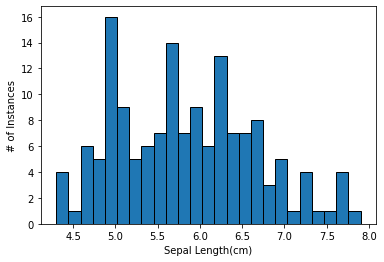

In [11]:
ind1 = 0 
plt.hist(Features[:,ind1], 25, edgecolor="k")
plt.xlabel("Sepal Length(cm)")
plt.ylabel("# of Instances")

Text(0, 0.5, '# of Instances')

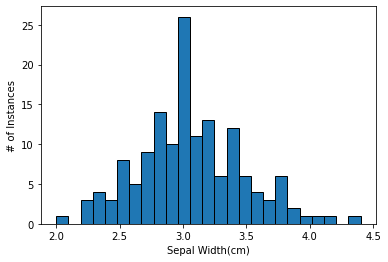

In [12]:
ind1 = 1 
plt.hist(Features[:,ind1], 25, edgecolor="k")
plt.xlabel("Sepal Width(cm)")
plt.ylabel("# of Instances")

Text(0, 0.5, '# of Instances')

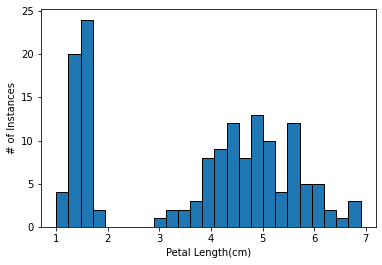

In [13]:
ind1 = 2 
plt.hist(Features[:,ind1], 25, edgecolor="k")
plt.xlabel("Petal Length(cm)")
plt.ylabel("# of Instances")

Text(0, 0.5, '# of Instances')

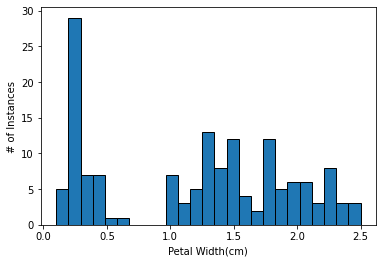

In [14]:
ind1 = 3 
plt.hist(Features[:,ind1], 25, edgecolor="k")
plt.xlabel("Petal Width(cm)")
plt.ylabel("# of Instances")

##**Decision Tree**

### **Train Decision Tree**

First step in training my decision tree is importing a function from sklearn.


In [15]:
from sklearn.tree import DecisionTreeClassifier 

Next, I decide what I want my max_depth and min_samples_leaf to be. 

max_depth is how many layers your tree will have

min_samples_leaf is the minimum number of leafs you want on the tree.

I just did random values for these to see how it would turn out.

In [16]:
 tree_model = DecisionTreeClassifier(max_depth = 3, min_samples_leaf=5)

Finally, all you need to do is fit your data to the decision tree.

In [17]:
 tree_model.fit(Features_Training, Breed_Training)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### **Test Decision Tree**

use tree_model.predict to get a prediction as to what breed the iris is based off the features.

Created a function that gives me the prediction of my model.

In [18]:
def Prediction(id):
  pred = tree_model.predict([Features_Testing[id]])
  pred = np.int(pred) 
  return I.target_names[pred]

A function that gives the actual breed of the iris

In [19]:
def Actual(id):
  actual = np.int(Breed_Testing[id])
  return I.target_names[actual]

Print the predicition and the actual to see how they compare.

In [20]:
print("Prediction: " + Prediction(0))
print("Actual: " + Actual(0))

Prediction: setosa
Actual: setosa


Can repeat multiple times with diffrent rows and see how they compare. 

Added print(" ") between each test for easer reading

In [21]:
print("Prediction: " + Prediction(1))
print("Actual: " + Actual(1))
print(" ")
print("Prediction: " + Prediction(2))
print("Actual: " + Actual(2))
print(" ")
print("Prediction: " + Prediction(3))
print("Actual: " + Actual(3))
print(" ")
print("Prediction: " + Prediction(4))
print("Actual: " + Actual(4))

Prediction: virginica
Actual: virginica
 
Prediction: setosa
Actual: setosa
 
Prediction: setosa
Actual: setosa
 
Prediction: virginica
Actual: virginica


### **Display Test**

Now lets actually see that the Decision tree looks like.

In [22]:
#Imports
from sklearn import tree 
import graphviz 

#Data Structure
dot_data = tree.export_graphviz(tree_model, out_file=None, feature_names=I.feature_names, class_names=I.target_names)
graph = graphviz.Source(dot_data) 

This part renders and exports the decision tree as "Iris_Decision_Tree.png" so we can download it or view it.

In [23]:
graph 
graph.format = 'png' 
graph.filename = 'Iris_Decision_Tree'
graph.view()

'Iris_Decision_Tree.png'

Now lets print it to see how it turned out.

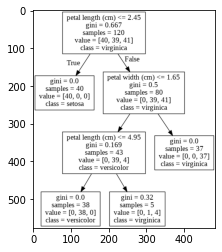

In [24]:
#Imports
import matplotlib.pyplot as plt
import matplotlib.image as img

#Mapping and showing the image
IMG = img.imread('Iris_Decision_Tree.png')
plt.imshow(IMG)
plt.show()

### **Evaluate Quality**

It is always important to evaluate how well your application is preforming. A good way to do this is by checking the Accuracy, Percision, Recall, and F1 score. 

*`Credit to Alex Shroyer for the idea and basic layout of the Metrics function.`*

In [25]:
def Metrics( model, features, labels, test_index ):
    out = {}
    out['TP'] = 0
    out['FP'] = 0 
    out['TN'] = 0
    out['FN'] = 0
    n = len(features)
    for i in range(n):
        prediction = np.int(model.predict([features[i]]))
        if(prediction == labels[i]):
            if(prediction == test_index):
                out['TP'] += 1
            else: 
                out['TN'] += 1
        else:
            if(prediction == test_index):
                out['FP'] += 1
            else:
                out['FN'] += 1
    out['Accuracy'] = (out['TP'] + out['TN']) / np.double(n)
    out['Precision'] = out['TP'] / (out['TP'] + out['FP'])
    out['Recall'] = out['TP'] / (out['TP'] + out['FN'])
    p = out['Precision'] 
    r = out['Recall']
    out['F1'] = 2*p*r / (p + r)
    return out


When reading the results it is important to remember:

F1 score, Accuracy, Precisison, and recall should all be close to 1, the closer the better your model is.


In [26]:
Results = Metrics(tree_model, Features_Testing, Breed_Testing, 0)
Results

{'Accuracy': 0.9333333333333333,
 'F1': 0.9090909090909091,
 'FN': 2,
 'FP': 0,
 'Precision': 1.0,
 'Recall': 0.8333333333333334,
 'TN': 18,
 'TP': 10}

##SVM_Classifier


Now repeate the steps above except using a svm classifer to see how diffrent classifiers preform diffrently. Code idea from Tyler Balson.

### Training SVM

In [27]:
from sklearn import datasets, svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

iris_data = datasets.load_iris()
X = iris_data.data
y = iris_data.target
class_names = iris_data.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y)

svm_classifier = make_pipeline(StandardScaler(), SVC(gamma='auto'))
my_model = svm_classifier.fit(X_train, y_train)

###Pickle model

In [28]:
from joblib import dump, load 
dump(my_model, 'Iris_model.pkl')

['Iris_model.pkl']

### Test SVM

In [41]:
def pred(array):
    prediction = my_model.predict(array)
    X = class_names[prediction]
    return X

In [56]:
arr = np.array([[5], [5], [5], [5]])
test = arr.transpose()
arr.shape
print(test.shape)

(1, 4)


In [63]:
pred(test)

array(['virginica'], dtype='<U10')

In [64]:
A = np.array([[6], [3], [1.86], [1.6]])
X = A.transpose()
A.shape
print(X.shape)
pred(X)

(1, 4)


array(['versicolor'], dtype='<U10')

## **Conclusion**

This is a good way to predict what breed of a iris you have. A plus side of this predicition method is that with the png of the decision tree you can print it off and classify iris in a real world setting. If you play around with your max_depth and min_sample_leafs you can increase your accuracy making it so you have an almost perfect system.

## **Work Cited**

Idea and basic layout for Metrics function from Alex Shroyer

Dataset from sklearn database and UCI Machine Learning on Kaggle

Data structure layout from Graphviz website